# [Pitch Detection]

## 주어진 음성 신호에 대해 Pitch contour를 그리고, 이를 통해 pitch value와 유성음/무성음 구간을 구한다.

![Image](./Figures/1.png)

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa
torch.manual_seed(1)
import librosa.display, librosa

# Load pre-defined functions
### Refer to Functions.py for details

In [2]:
from Functions import *

# Load data

#### 음성 신호에서 발음이 나타나는 5초를 불러온다. 그래프에서 볼 수 있듯이, 0.15초 부근에서 무성음이 유성음으로 바뀌는 것을 짐작할 수 있다.
#### 예시는 10kHZ sampling rate

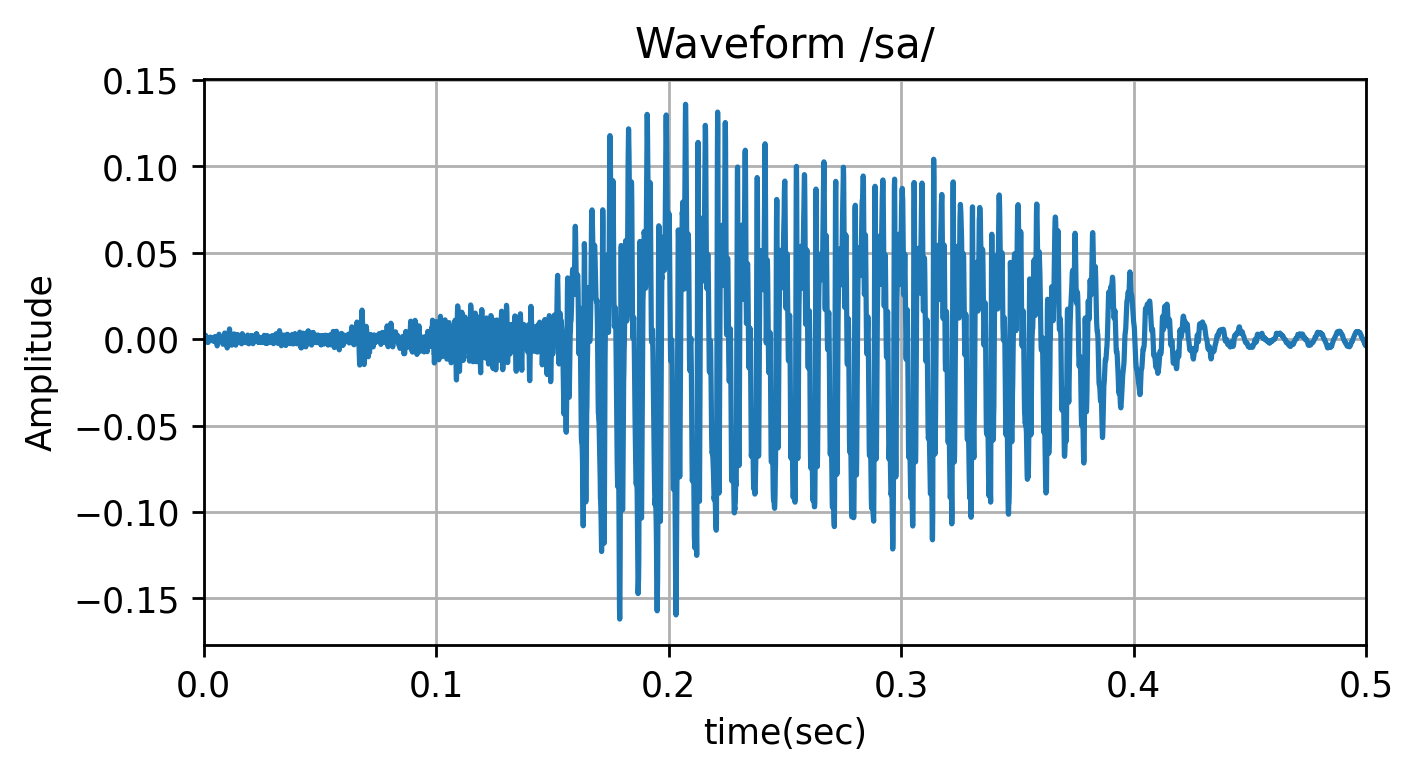

In [3]:
signal, sr = librosa.load('./data/sa11.wav',10000)

sa = signal[9000:14000]
t_axis = np.linspace(0,0.5,5000)

plt.figure(figsize = (6,3))
plt.xlabel('time(sec)')
plt.ylabel('Amplitude')
plt.title('Waveform /sa/')
plt.xlim(0,0.5)
plt.grid(True)
plt.plot(t_axis,sa)

# Pitch detection

### Parameters
#### Window || 256 length rectangular window
#### Overlap || 50%
#### Lowpass filtering cutoff frequency || 900Hz (human pitch range: 50 ~ 250Hz)
#### Center clipping coefficient || 0.68 (trial-and-error)
#### Global maximum threshold || 0.55 (trial-and-error)


In [4]:
window = np.ones(256)
c_ = 0.68
th_ = 0.55
overlap = 0.5
sr = 10000 #sampling_rate

In [5]:
pitch_contour = Pitch_detect(sa, window,sr, overlap, c_, th_)

## Visualization

In [6]:
def plotcontour(contour,shift,sr):
    t_axis = (0.5+np.arange(len(contour)))*shift/sr
    plt.figure(figsize = (10,5))
    plt.plot(t_axis,contour)
    plt.xlim(0,0.5) #예시의 경우 0.5초
    plt.xlabel('Time (sec)')
    plt.ylabel('Pitch (Hz)')
    plt.title('Pitch contour')
    plt.grid(True)

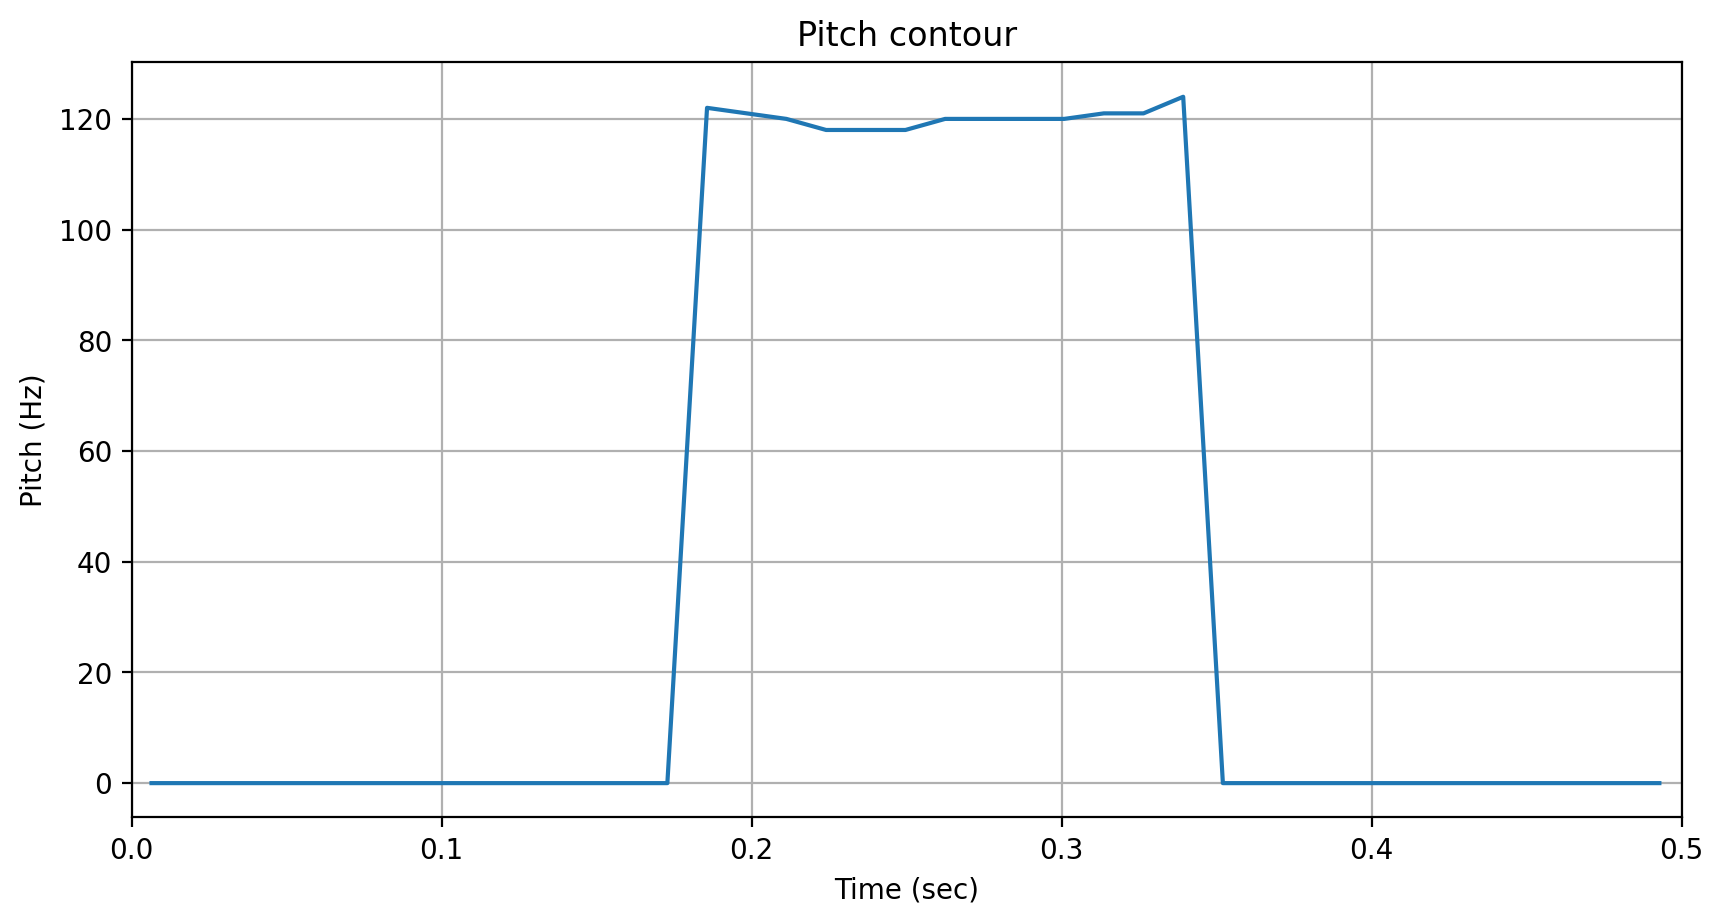

In [7]:
plotcontour(pitch_contour, len(window)*overlap, sr)